<h1><center>Data science for Geographers</center></h1>

<h2><center>Practical 3 - Regression - assumptions and diagnostics in R</center></h2>

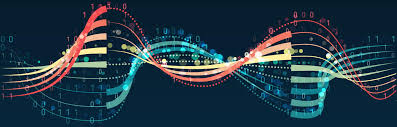

## Contents<a class="anchor" id="contents"></a>

- 1. [Introduction](#section1)
    - [Load the required packages](#section1.1)
    - [Load the data](#section1.2)
- 2. [Regression interpretation refresh](#section2)
    - [Linear regression from last practical](#section2.1)
    - [Interpretation](#section2.2)
- 3. [How good is our model?](#section3)
    - [Multiple R-squared](#section3.1)
    - [Adjusted R-squared](#section3.2)
    - [Other measures of fit - AIC](#section3.3)
    - [Some final notes about model fit](#section3.4)
    - [Exercise](#exercise3)
- 4. [Assumptions of regression modelling](#section4)
    - [What are residuals?](#section4.1)
    - [Assumption 1: linearity](#section4.2)
    - [Assumption 2: Normality of errors](#section4.3)
    - [Assumption 3: Constant variance of residuals (homoscedasticity)](#section4.4)
    - [One last thing...](#section4.5)
    - [Exercise](#exercise4)


## 1. Introduction<a class="anchor" id="section1"></a>

So far in the course, we have successfully managed to import our data, clean it and recode the necessary variables before finally running our first regression model. Initially we started with just a simple linear regression model. This simple analysis consisted of our dependent variable (the rates of smokers during pregnancy in datazones) predicted by a single independant variable (the density of tobacco retailers in those datazones). Because we know that smoking is predicted by other factors, some of which are also related to your likelihood of living in an area of higher density (i.e. levels of deprivation etc) we then estimated a more complex model where we add these other factors (known as confounders). 

In this practical, we will look at the outcome of that regression and how we might interpret it, then we will explore some of the assumptions of the model, and run some model diagnostics. This second step is a really important stage of the data analysis process. All statistical models are subject to a set of <b><i>assumptions</b></i> which are things that we have to <b><i>assume</b></i> are true in order to interpret our results. As we will go on to see, some of these assumptions are more realistic than others. But, crucially, almost no statistical model <b><i>ever fully</b></i> meets these assumptions. When we talk about <b><i>limitations and weaknesses</b></i> in the context of statistical analyses we are often talking about the extent to which our models meet the assumptions of the statistical methods. Our job as data analysts is to understand these assumptions and be able to <b><i>reflect and discuss</b></i> how they may have affected the results and therefore our conclusions.  

Ok, so let's reproduce our analysis from the previous workshop, starting with loading our required packages again...

### Load the required packages<a class="anchor" id="section1.1"></a>

First, let's load the packages that we will need.

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.3      ✔ purrr   1.0.1 
✔ tibble  3.2.1      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.4      ✔ forcats 1.0.0 
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Load the data<a class="anchor" id="section1.2"></a>

Next let's load our data from before, contained in the `merged_data.csv` file.

In [2]:
analysis_data <- read_csv("merged_data.csv")

Rows: 6973 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): datazone, urban_rural, income_quintile, access_quintile, urban_rur...
dbl (16): retailer_count, total_population, simd_decile, simd_rank, simd_qui...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[Back to contents](#contents)

## 2. Regression interpretation refresh<a class="anchor" id="section2"></a>

You should be able to think back to both your "Fundamental Methods" course in 1st year and "Key Methods" from your 3rd year to help you understand the regression output in R. Hopefully you had a go at this in last week's practical as well. But let's have a quick refresh about coefficients, slopes and p-values. 


### Simple linear regression from last practical<a class="anchor" id="section2.1"></a>

And let's run our regression from last week. Remember, our research question is "in urban areas, is the number of tobacco retailers associated with smoking rates in datazones in Scotland?"

As last week, first we need to filter only the urban datazones and check that the new data object has removed the non-urban datazones.

In [3]:
#Create a new analysis object
urban_only <- analysis_data %>%
    filter(urban_rural_2cat == "Urban")

head(urban_only)

datazone,retailer_count,total_population,simd_decile,simd_rank,simd_quintile,income_rank,health_rank,employment_rank,education_rank,⋯,crime_rank,housing_rank,alcohol_admissions,drug_admissions,smoking_rate,urban_rural,retailers_adj,income_quintile,access_quintile,urban_rural_2cat
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
S01006506,34,894,7,4691,4,3936,5174,3220,5887,⋯,4664.0,3248.0,29,30,9.09,Accessible Small Towns,38.03132,Third,Fourth,Urban
S01006507,19,793,7,4862,4,4829,5051,4481,4384,⋯,4602.0,3486.0,130,126,11.11,Accessible Small Towns,23.95965,Fourth,Second,Urban
S01006508,16,624,9,5686,5,4460,5942,5110,5915,⋯,4563.5,5342.0,71,18,4.76,Accessible Small Towns,25.64103,Fourth,Fourth,Urban
S01006509,12,537,7,4332,4,3481,3871,3229,6401,⋯,5626.0,4394.5,80,28,17.65,Accessible Small Towns,22.34637,Third,Third,Urban
S01006510,20,663,6,3913,3,3344,3049,3448,4092,⋯,3885.0,3736.0,89,44,12.50,Accessible Small Towns,30.16591,Third,Least deprived,Urban
S01006511,17,759,9,6253,5,5469,5783,5346,5410,⋯,6928.0,5924.0,55,0,0.00,Accessible Small Towns,22.39789,Fourth,Fourth,Urban


Next, we need to run our simple regression model, making sure we run it on the new data object (`urban_only`).

In [4]:
#Run a linear regression model
simple_linear_regression <- 
    lm(smoking_rate ~ retailers_adj, 
       data = urban_only, 
       na.action = na.exclude)

Now we have our regression model object, we can view the results. First we can view the summary of the regression.

In [5]:
summary(simple_linear_regression)


Call:
lm(formula = smoking_rate ~ retailers_adj, data = urban_only, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.542 -10.660  -2.383   8.180  59.500 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13.30184    0.38626  34.438   <2e-16 ***
retailers_adj  0.03284    0.01337   2.457   0.0141 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.75 on 5744 degrees of freedom
Multiple R-squared:  0.00105,	Adjusted R-squared:  0.0008757 
F-statistic: 6.035 on 1 and 5744 DF,  p-value: 0.01405


And then we look at the confidence intervals for the coefficients.

In [6]:
confint(simple_linear_regression)

,2.5 %,97.5 %
(Intercept),12.54463571,14.05904673
retailers_adj,0.00663315,0.05903832


### Interpretation<a class="anchor" id="section2.2"></a>

The most important thing here is the row of information labelled `retailers_adj`. This contains the estimate of the effect size as well as the standard error and associated p-value. 

In our case, the <b><i>estimate</b></i> is `0.03284`, which means that every 1 unit increase in tobacco retailers results in an increase of 0.03284 percent in the rate of pregnancy smokers. Remember if this estimate was a negative number, then as retailers increased rates of pregnancy smokers would decrease. The p-value is `0.0141`. This effectively tells us how likely it is that we would see the same relationship between retailer density and pregnancy smoking even if no relationship exists between them. In our case the probabillity is 1.4% (i.e. 0.014) which is less than the 0.05 critical value and is therefore <b><i>statistically significant</b></i>. The confidence intervals show us the intervals within which we are confident the true value lies. We should all be familiar with this, but what about some of the other pieces of information in the output?

[Back to contents](#contents)

## 3. How good is our model? Model fit<a class="anchor" id="section3"></a>

Up to now, we haven't considered some of the other aspects of the regression, particularly the bits labelled `Multiple R-squared` and `Adjusted R-squared`. Some of you may recall that R-squared tells us about the <b><i>proportion of the variation in the dependant variable</b></i> that is explained by the predictor. Well, `multiple R-squared` does the same thing, it just refers to the fact that in regression we can have multiple variables. 

Let's run the regression model again.

In [7]:
#Run a linear regression model
simple_linear_regression <- 
    lm(smoking_rate ~ retailers_adj, 
       data = urban_only, 
       na.action = na.exclude)

summary(simple_linear_regression)


Call:
lm(formula = smoking_rate ~ retailers_adj, data = urban_only, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.542 -10.660  -2.383   8.180  59.500 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13.30184    0.38626  34.438   <2e-16 ***
retailers_adj  0.03284    0.01337   2.457   0.0141 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.75 on 5744 degrees of freedom
Multiple R-squared:  0.00105,	Adjusted R-squared:  0.0008757 
F-statistic: 6.035 on 1 and 5744 DF,  p-value: 0.01405


### Multiple R-squared<a class="anchor" id="section3.1"></a>

Look at the `multiple R-squared` value: `0.00105`. This is a proportion and can be expressed as a %. In our case, our model with just tobacco retailers has explained just `0.105%` of the variation in smoking rates (0.00105 * 100). We often also refer to this concept as <b><i>model fit</b></i>. If we add more variables to our model, what do you think will happen? Let's do this, by adding income deprivation to our model...

In [8]:
multiple_linear_regression <- 
    lm(smoking_rate ~ retailers_adj +
       income_rank, 
       data = urban_only, 
       na.action = na.exclude)

summary(multiple_linear_regression)


Call:
lm(formula = smoking_rate ~ retailers_adj + income_rank, data = urban_only, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.807  -6.050  -1.064   5.128  59.848 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.763e+01  3.618e-01  76.362   <2e-16 ***
retailers_adj -3.950e-03  1.007e-02  -0.392    0.695    
income_rank   -4.046e-03  6.092e-05 -66.425   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.586 on 5743 degrees of freedom
Multiple R-squared:  0.4351,	Adjusted R-squared:  0.4349 
F-statistic:  2211 on 2 and 5743 DF,  p-value: < 2.2e-16


Now, look at the `multiple R-squared` value in this new model. It has gone up to a whopping 44%! Adding this particular variable (income deprivation) massively improves our abillity to predict smoking rates. Note as well that the effect of retailers is now insignificant indicating the confounding effect of income deprivation.

### Adjusted R-squared<a class="anchor" id="section3.2"></a>

However, there is a problem with using  `multiple R-squared` and that is that adding variables will <b><i>always</b></i> increase `multiple R-squared`. Even if the predictors are not very statistically significant or very strong predictors, they will still increase `multiple R-squared` a little bit. 

This is a problem, because just adding more and more predictors makes the model more complex and less likely to be a good fit if we were to collect another sample of data. In other words a good fitting model with sample data might not be a good fit with other data from the population. To counteract this, we have this thing called `Adjusted R-squared`. This is basically the same thing as the `multiple R-squared` but the only difference is that it takes into account the number of variables in the model. From the above output, you can see that the `adjusted R-squared` is lower than the `multiple R-squared`.  So, in a model with lots of variables, the addition of extra variables has to significantly improve the model. This means that `adjusted R-squared` is a useful measure to help us compare between models with different variables added. 

Let's add a couple more variables (`access_rank` and `crime_rank`; both of which we might not expect to be as strongly related to smoking), and compare the `adjusted R-squared` value to the previous model.

In [9]:
multiple_linear_regression <- 
    lm(smoking_rate ~ retailers_adj +
       income_rank +
       access_rank +
       crime_rank +
       housing_rank, 
       data = urban_only, 
       na.action = na.exclude)

summary(multiple_linear_regression)


Call:
lm(formula = smoking_rate ~ retailers_adj + income_rank + access_rank + 
    crime_rank + housing_rank, data = urban_only, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.805  -6.027  -1.180   5.127  60.117 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.975e+01  5.512e-01  53.976  < 2e-16 ***
retailers_adj -1.761e-02  1.063e-02  -1.657   0.0975 .  
income_rank   -4.337e-03  9.283e-05 -46.715  < 2e-16 ***
access_rank   -3.940e-04  7.826e-05  -5.035 4.94e-07 ***
crime_rank    -5.766e-04  9.217e-05  -6.256 4.24e-10 ***
housing_rank   7.942e-04  9.082e-05   8.744  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.474 on 5740 degrees of freedom
Multiple R-squared:  0.4485,	Adjusted R-squared:  0.448 
F-statistic: 933.5 on 5 and 5740 DF,  p-value: < 2.2e-16


We can see that the `adjusted R-squared` goes up a bit but nowhere near as much as before. We might consider omitting these variabels from our final model, particularly if the primary concern of the model was to make <b><i>predictions</b></i>.

### Other measures of fit - AIC<a class="anchor" id="section3.3"></a>

There is another approach to measuring model fit that you may see in the literature. This is known as the Akaike Information Criterion or AIC for short. This is similar to adjusted r-squared but is considered a better indication of how well your model would predict on entirely new sample data. In R, we can estimate AIC using `AIC()` as below.

In [10]:
AIC(simple_linear_regression)
AIC(multiple_linear_regression)

[1] 45560.15

[1] 42154.93

Look at the two numbers above. I bet you're thinking they look a bit confusing (the simple linear regression has a higher AIC than the multiple regression!). The important thing to remember about AIC is that the <b><i>smaller</b></i> the value the better the fit. This is definitely a bit confusing but important to remember! 

### Some final notes about model fit<a class="anchor" id="section3.4"></a>

As I said earlier in the course, unless we are interested purely in <b><i>prediction</b></i> (which in most cases we are not, we are interested in isolating the effect of a single variable i.e. tobacco retailer density) we tend not to worry too much about model fit. However, the tools above are an important part of understanding our model and how it has worked. It can also be a useful way for us to help decide if we need to include a potential confounder. We may have a theoretical reason to include a confounding variable (like access to services deprivation) but if it doesnt improve model fit by very much then that implies that it is not strongly related to smoking rates and we might consider leaving it out of our model. 

The last thing to note about model fit is that it can vary wildly between different independent variables. In the natural sciences (e.g. physical geography), values of R-squared and AIC tend to indicate much better fitting models because phenomena in the physical environment (e.g. river flow or sediment deposition) are often less complex in terms of input predictor variables. However, in the social sciences, things like human behaviour tend to be much more complex (i.e. think about all of the influences on an individual's propensity to smoke for example) with lots of potential predictors. In both cases of course, not all of these predictors will be confounders of our predictor of interest so will not need to be included as confounders. For this reason, we tend not to compare measures of fit between different independent variables (e.g. between river deposition and smoking behaviours) because of these differences in the underlying phenomena.

### Exercise<a class="anchor" id="exercise2"></a>

1. Create a new data object of non-urban areas.
2. Run the same models as above and use the adjusted r-squared values to compare. Try and think which is the best models to use.
3. Repeat step 2 but estimate the AIC for each model instead.

In [11]:
#Solutions - Note these are just a guide to help with the code!

#1. 
urban_only <- analysis_data %>%
    filter(urban_rural_2cat == "Urban")

#2. 
multiple_linear_regression <- 
    lm(smoking_rate ~ retailers_adj +
       income_rank +
       access_rank +
       crime_rank +
       housing_rank, 
       data = urban_only, 
       na.action = na.exclude)

summary(multiple_linear_regression)

#3. For the model object above
AIC(multiple_linear_regressionl)


Call:
lm(formula = smoking_rate ~ retailers_adj + income_rank + access_rank + 
    crime_rank + housing_rank, data = urban_only, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.805  -6.027  -1.180   5.127  60.117 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.975e+01  5.512e-01  53.976  < 2e-16 ***
retailers_adj -1.761e-02  1.063e-02  -1.657   0.0975 .  
income_rank   -4.337e-03  9.283e-05 -46.715  < 2e-16 ***
access_rank   -3.940e-04  7.826e-05  -5.035 4.94e-07 ***
crime_rank    -5.766e-04  9.217e-05  -6.256 4.24e-10 ***
housing_rank   7.942e-04  9.082e-05   8.744  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.474 on 5740 degrees of freedom
Multiple R-squared:  0.4485,	Adjusted R-squared:  0.448 
F-statistic: 933.5 on 5 and 5740 DF,  p-value: < 2.2e-16


ERROR: Error in AIC(multiple_linear_regressionl): object 'multiple_linear_regressionl' not found


[Back to contents](#contents)

## 4. Assumptions of regression modelling<a class="anchor" id="section4"></a>

As we noted earlier, there are many assumptions that go into regression modelling. We have already noted one of the key ones in an earlier practical; confounding. If we want to interpret any effect from a model as being true or a causal relationship we have to assume that there are no <b><i>unmeasured</b></i> confounding effects. There is no way to empirically test this, we have to rely on a solid theoretical justification and knowledge of the system we are studying (this is where our reading and research comes in!).

However, there are other assumptions we have to consider, particularly with linear regression modelling. You may have noticed near the top of the linear regression output, where it says `residuals` and you may have wondered what these were and why they might be important?

### What are residuals? Refresh<a class="anchor" id="section4.1"></a>

In the simplest sense, residuals are the differences between a predicted value in a model and the actual value in the data. In other words, they are deviations of each datapoint from the line of best fit:

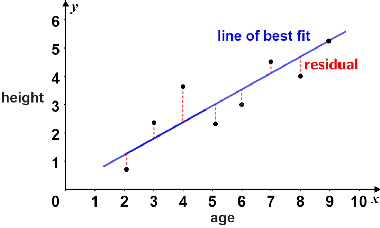

As it turns out, they are a crucial part of our toolkit for testing the key assumptions of a regression model. There are many assumptions that underpin regression models but we are going to focus on 3 key ones here:

- Assumption of linearity
- Constant variance of errors (homoscedasticity)
- Normality of errors

Each of these can be tested by close examination of the residuals from our models. 

Just to note as well, these three assumptions are often referred to collectively as the "IID" assumption. IID refers to "independent and identically distributed" and is also commonly used when referring to the normal distribution. If we think of the residuals from a regression model as themmselves simply another variable, then the assumptions above (and the IID assumption) are basically saying that regression modelling assumes that the residuals are normally distributed which is why the IID assumptions are the same. 

To illustrate these assumptions and how they impact interpretations of our models we are going to simulate some data to help us visualise clear examples of good and bad models. As a side-note, simulating data in this way can sometimes be a helpful way to illustrate some key concepts.

First, we will start by simulating two variables with a standard linear association between them. Don't worry too much about the code, unless you are interested in simulating data for your own purposes. The comments next to the code indicate what each line does for those that are interested.

First let's simulate some "good data" with a nice linear relationship between the two variables:

In [ ]:
# Create x and y values that have a positive linear relationship
x <- runif(100, 0, 100) #generate 100 random numbers between 0 and 100
y <- x + rnorm(100, 0, 10) # generate some y values that are linearly correlated with x

good_data <- data.frame(x, y) #Combine these new variables into a dataframe

Now let's simulate some "bad data", which as we will see violates some key assumptions...

In [ ]:
# Create x and y values that have a non-linear relationship
x <- runif(100, 0, 100) #generate 100 random numbers between 0 and 100
y <- x^2 + rnorm(100, 0, 500) # generate some y values that are non-linearly related to x. 
#Note the X^2 part above. This is saying "x to the power 2" or "x squared" which is a exponential transformation.

bad_data <- data.frame(x, y) #Combine these new variables into a dataframe

Now let's run regression models for each of these datasets we have just created...

In [ ]:
good_data_model <- lm(y ~ x, data = good_data)
bad_data_model <- lm(y ~ x, data = bad_data)

### Assumption 1: linearity<a class="anchor" id="section4.2"></a>

Linear regression is all about straight lines. Our regression line of best fit might go up and down and with a varying slope or gradient, but it will always be a straight line. Linear regression can only estimate relationships that operate on a straight line, i.e. linear.

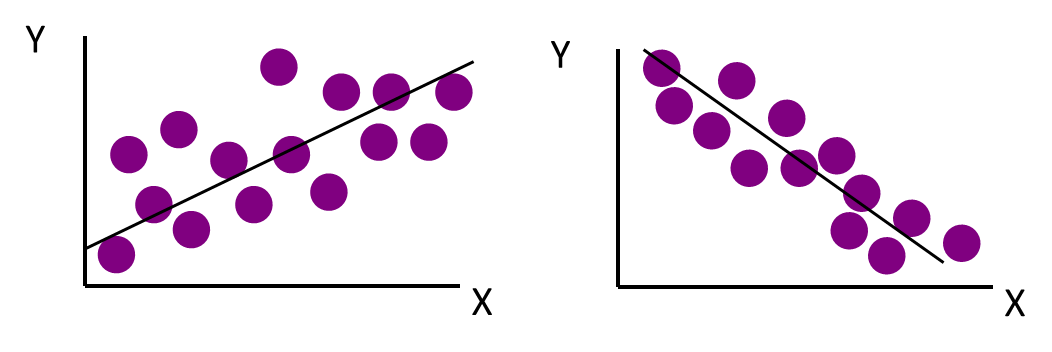

However, in both the social and natural sciences, many variables are associated with each other in a non-linear relationship.

Here is a real-life example of a classic non-linear relationship, the relationship between national GDP per-capita and life expectancy:

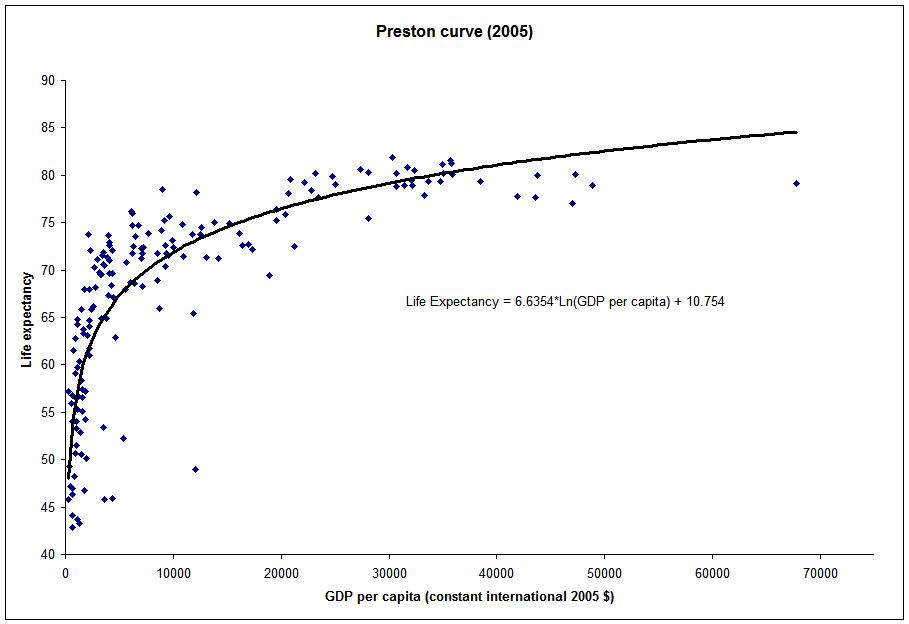


A straight line through these data would only tell us a fraction of the story of the relationship between these two variables.

So, let's go ahead and figure out how we use residuals from our model to examine if our variables are linearly related to each other or not. 

To do this we examine what we call a residual versus fitted values plot. This is essentially a scatterplot of our predicted values (the fitted values) on the x-axis against the residual values on the y-axis. 

We can produce this plot using the `plot()` command and placing the name of our model object in the parentheses. Let's do this below for both the "good" and the "bad" data... 

Note: Don't worry about the `which = 1` part for now. I'll explain why later!

In [ ]:
#First with the "good data"
plot(good_data_model, which = 1)

In [ ]:
#First with the "bad data"
plot(bad_data_model, which = 1)

Look at these two plots (note the different scales on the y-axis between the two plots). Remember, the residuals represent variation in the outcome or dependant variable that is not explained by the model. What we are looking for in this plot is a roughly consistent flat line. If your residuals show anything other than a flat line (like in the first plot) and show a curved or wiggly line (like in the second plot) then it is likely that your outcome variable has a non-linear relationship with your predictor variables. 

In some cases it is possible to do what we call a <b><i>transformation</b></i> of our variables. This transformation basically involves a mathematical adjustment to the non-linear variable and converts it to a linear variable. We can then model this new variable with a linear model as its relationship to the predictors is linear. We will cover this in more detail in the next practical!

### Assumption 2: Normality of errors<a class="anchor" id="section4.3"></a>

The next two assumption we need to examine is the assumption that our residuals from our model are <b><i>normally distributed</b></i>. Hopefully you can all remember the concept of the normal distribution from previous courses...

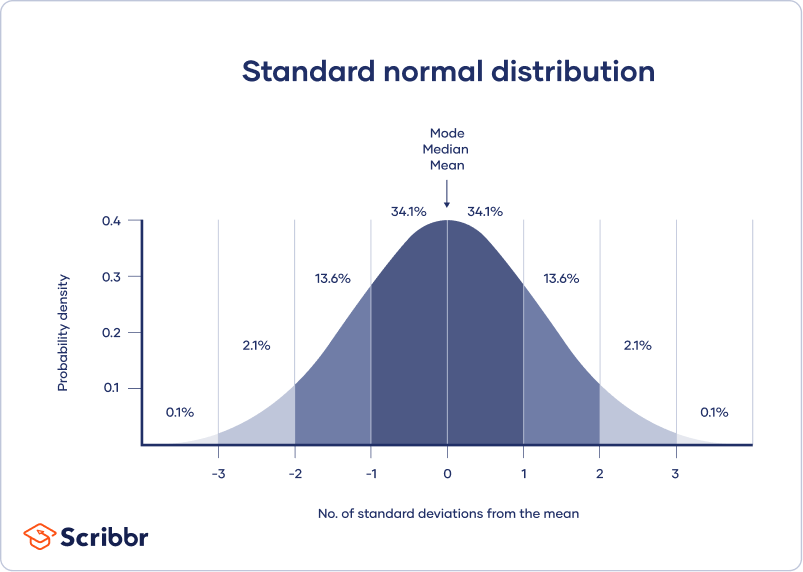

The reason why we need the normally distributed residuals is because it is the key assumption of the t-test that we use to determine the statistical suignificance of the slope coefficient that we are interested in. If the residuals are not normally distributed we cannot trust the p-value from our analysis.

We can test this assumption using a quantile-quantile residual plot (or Q-Q plot for short, you used these same plots in key methods!).

In [ ]:
plot(good_data_model, which = 2)
plot(bad_data_model, which = 2)

If you remember from key methods, quantile quantile plots show deviations from the normal distribution. The closer the points to the line, the closer to a normal distribution. As you can see from our plots, the "good" data residuals look pretty normally distributed whereas the "bad" data residuals do not.

### Assumption 3: Constant variance of residuals (homoscedasticity)<a class="anchor" id="section4.4"></a>

Our third assumption concerns the <b><i>variation</b></i> in the residuals. Specifically, linear regression assumes that the variation is <b><i>consistent</b></i> across all of the residual variables. The reason why this assumption is needed is similar to the assumption of normality; because residuals with variance that is inconsistent mean that we cannot trust the p-value for the test of significance for our slope coefficient.

We can examine this assumption using a <b><i>Spread-Location plot</b></i>...

In [ ]:
plot(good_data_model, which = 3)
plot(bad_data_model, which = 3)

What we are interested in here is the spread and scatter of the points. Specifically, we don't want to see any pattern at all, we want to see an essentially random scatter like we see in the first plot. The pattern in the second is clearly non-random. If you think about it, you can understand why. To illustrate, let's look at simple scatter plots of the two variables, together with fitted lines...

In [ ]:
#"Good" data
ggplot(good_data, aes(x = x, y = y)) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, level = 0.95)

#"Bad" data
ggplot(bad_data, aes(x = x, y = y)) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, level = 0.95)

Look at these two plots. The top one shows that the points are consistently randomly scattered above and below the line all across the plot. In other words, the variabillity of the points is the same and is consistent. In the second the variability is <b><i>not</b></i> consistent. At the ends of the fitted line the points lie above the line, and in the middle of the line the points are below. This is what we call a <b><i>heteroscedastic</b></i> residual structure. With this data we would not be prepared to trust the p-values from our analysis.

Let's now look at the actual model summaries from both our "good" and "bad" datasets.

In [ ]:
summary(good_data_model)
summary(bad_data_model)

Look at and compare both outputs. Looking at just the p-values and the adjusted R-squared in both, hopefully you can see that they tell us nothing to indicate the problems with our models that we identified with the previous plots. Both models give us significant p-values for the slope coefficient for x and also show a good level of fit in terms of the adjusted R-squared values. This indicates why it is so important to always look at your model residuals when interpreting the results from a regression model. If you don't, you risk significantly mis-interpreting your model, and particularly the nature of the relationship between your dependent and independent variables.

Of course, we are looking at simulated data here, so the issues are much more obvious than it is likely to be when looking at real data! Often it is a judgement call on the part of the data analyst to decide to what extent your models are violating key assumptions.

A last point, we have looked at each of the assumptions and the related plots separately, but it is easy to generate all of these plots in one go by just leaving out the `which = n` part of the code (this is why I said we can ignore this bit of the code earlier on!). This just specifies a specific plot rather than plotting all of the plots available in the `plot()` function.

Note: This command will also add another plot called a "residuals versus leverage" plot that we haven't looked at. This plot is used to help with the identification of outliers (single cases that seem unusual or different to other observations). You may want to explore this plot as well to help identify points that may be significantly impacting your results.

In [ ]:
plot(good_data_model)
plot(bad_data_model)

### Exercise<a class="anchor" id="exercise4"></a>

1. Run some models on our smoking and tobacco retailer data.
2. Compare these models using the plots we have completed above
3. To what extent do the models meet the 3 assumptions we discussed today?

Note: No solution here as the emphasis is on the interpretation of the plots that you produce! Ask for help if you get stuck!

### One last thing: Independence of errors<a class="anchor" id="section4.5"></a>

I mentioned before that a further assumption of regression is one we have already considered, confounding. Regression assumes that we have measured and adjusted for all confounders. Formally, this is because we need all observations to be independent of each other. If there are unmeasured confounders, then some obeservations will be related to each other, because they may share characteristics of the thing we have not measured. For example, if we did not adjust for deprivation in our models of tobacco retailing on smoking behaviour, then residuals for individual observations in similar levels of deprivation would be more closely related than residuals for individual observations in different levels of deprivation. This violates the assumption of independent errors. However, adjusting for deprivation (i.e. including it in our model) removes this association between residuals.  

However there are other examples of this that we should consider. A good example is time. Consider, if we had data over time. In this example, observations collected closer in time to each other will have residuals that are more similar than observations collected further apart in time. The image below llustrates this:

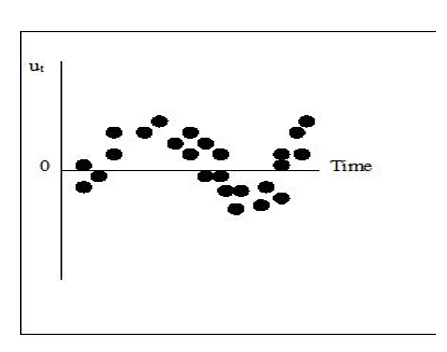

As before, we need residuals to be randomly scattered. But when we work with time we violate this assumption. This is known as <b><i>temporal autocorrelation</b></i> and is why when working with <b><i>longitudinal</b></i> data we are required to use slightly more advanced methods. More on that later!

<b>Bonus question! What other variable might be a source of autocorrelation? Hint: We are geographers after all...</b>

### A final reminder about assumptions

One last thing I want to close with regarding regression assumptions. No model will <b><i>ever</b></i> fully meet these assumptions. It is never possible to fully account for all confounding effects and nor is it possible to ensure that all residuals are normally distributed; no model is ever perfect, it is a model after all! As a data analyst, all you can do is be aware of these assumptions, be able to reflect on their effect on your model and most importantly be able to understand the implications for your interpretation of your model and therefore your research question.

[Back to contents](#contents)